In [1]:
url='https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data'

In [36]:
df=pd.read_csv(url, index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [57]:
output=df.iloc[:,-1]

## Implementation of KNN Algo

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Standardizing the features on the same scale using Standard Scalar

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
ss=StandardScaler()

In [41]:
ndf=df.iloc[:,:-1]
ndf

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


In [26]:
ss.fit(ndf)

StandardScaler()

In [44]:
scaled_features=ss.transform(ndf)
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [42]:
df_scaled=pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [60]:
X_train,X_test,y_train,y_test=train_test_split(df_scaled,output, test_size=0.3)

### Confirming the size of Train test split

In [63]:
X_train.shape, y_train.shape

((700, 10), (700,))

In [64]:
X_test.shape,y_test.shape

((300, 10), (300,))

## Applying KNN Algo

In [66]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=1)

In [68]:
kn.fit(X_train,y_train)
pred=kn.predict(X_test)

## Evaluation of Model Predictions

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

Accuracy Socre of Prediction is 0.9066666666666666 

[[139  14]
 [ 14 133]]

Above Confusion Matrix Vizualized


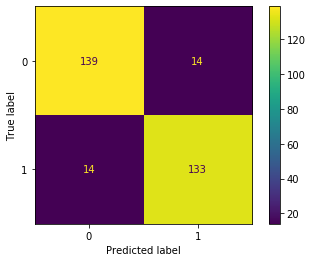

In [106]:
print('Accuracy Socre of Prediction is {} \n'.format(accuracy_score(y_test,pred)));
print(confusion_matrix(y_test,pred))
print('\nAbove Confusion Matrix Vizualized');
plot_confusion_matrix(kn,X_test,y_test);


In [100]:
print('Classification Report: \n\n',classification_report(y_test,pred));

Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.91      0.91       153
           1       0.90      0.90      0.90       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



#### To get the better accuracy we can go ahead and try to evaluate the most optimal value of n_neighbors that we shoulf select to get the maximum accuracy

In [185]:
error_rate=[]
for k in range(1,60):
    kn=KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train,y_train)
    pred=kn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
    
df2=pd.concat([pd.DataFrame(np.arange(1,60)),pd.DataFrame(error_rate)],axis=1)
df2.columns=['K-value','Error_Rate']
(df2.sort_values(by='Error_Rate', ascending=True))   

,K-value,Error_Rate
47,48,0.046667
58,59,0.050000
43,44,0.050000
55,56,0.050000
53,54,0.050000
57,58,0.050000
49,50,0.050000
45,46,0.053333
41,42,0.053333
48,49,0.053333


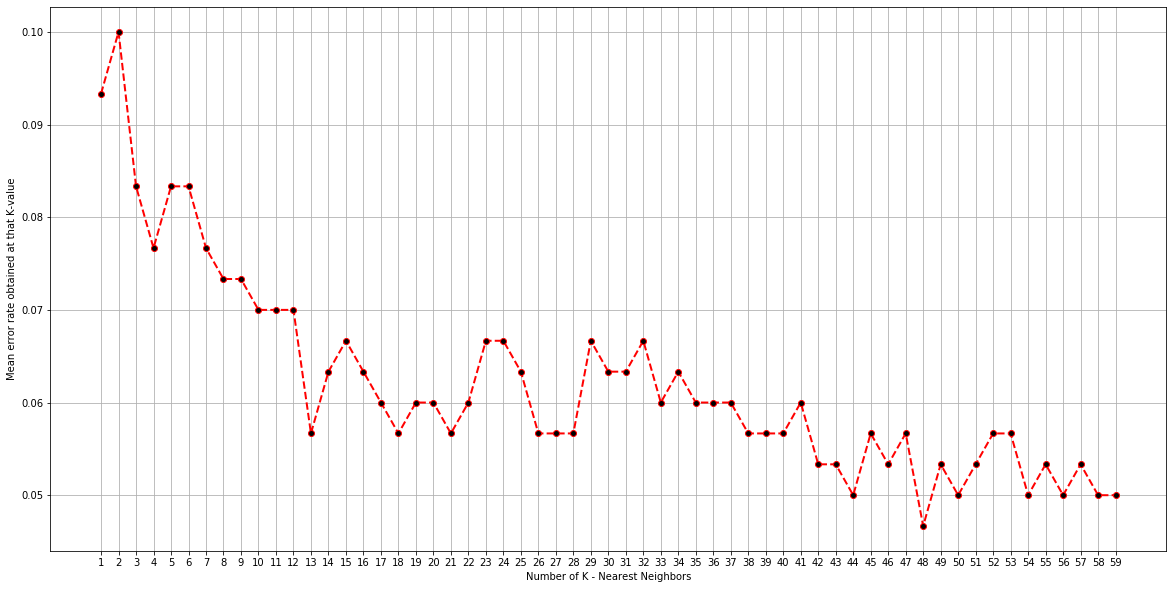

In [187]:
plt.figure(figsize=[20,10])
plt.plot(np.arange(1,60),error_rate, color='red', marker='o', linestyle='--',linewidth=2, markersize=6,mfc='black')
plt.xlabel('Number of K - Nearest Neighbors');
plt.ylabel('Mean error rate obtained at that K-value');
plt.xticks((np.arange(1, 60, step=1)));
plt.grid(axis='both')

### From above graph and table above, we can observe that the minimum value exists at k value=48

## Now let's use this result to verify the accuracy of predictions:

Accuracy Socre of Prediction is 0.9533333333333334 

[[145   8]
 [  6 141]]

Above Confusion Matrix Vizualized


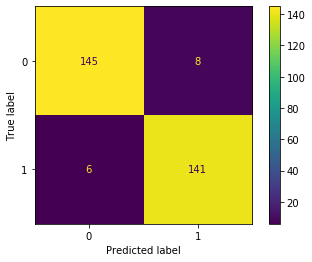

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix
kn=KNeighborsClassifier(n_neighbors=48)
kn.fit(X_train,y_train)
pred=kn.predict(X_test)
print('Accuracy Socre of Prediction is {} \n'.format(accuracy_score(y_test,pred)));
print(confusion_matrix(y_test,pred))
print('\nAbove Confusion Matrix Vizualized');
plot_confusion_matrix(kn,X_test,y_test);

In [190]:
print('Classification Report: \n\n',classification_report(y_test,pred));

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.95      0.95       153
           1       0.95      0.96      0.95       147

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## We have achieved the results that are way more accurate then what we were getting previously